# Лабораторная работа 5

**Тема**: Обучение на основе временных различий

**Курс**: Методы машинного обучения

**Группа**: ИУ5-23М

**Студент**: Костарев А. П.

## Цель

Ознакомление с базовыми методами обучения с подкреплением на основе временных различий.

## Задание

На основе рассмотренного на лекции примера реализуйте следующие алгоритмы:

- SARSA
- Q-обучение
- Двойное Q-обучение

для любой среды обучения с подкреплением (кроме рассмотренной на лекции среды Toy Text / Frozen Lake) из библиотеки Gym (или аналогичной библиотеки).



## Выполнение задания




## Описание среды

Возьмём из библиотеки Gym среду Taxi-v3: https://www.gymlibrary.dev/environments/toy_text/taxi/

Задача представляет собой задачу о такси из книги Тома Диттериха "Обучение с иерархическим подкреплением с помощью декомпозиции функции MAXQ Value".

На карте есть 4 определенных места, обозначенных R(ed), G(reen), Y(ellow) и B(lue). Когда начинается поездка, такси выезжает из случайного квадрата, а пассажир оказывается в случайном месте. Такси подъезжает к месту нахождения пассажира, забирает его, отвозит в пункт назначения (другое из 4 указанных мест), а затем высаживает пассажира. Как только пассажир высажен, поездка заканчивается.

Есть 500 состояний:
- карта размером 5x5;
- 4 локации;
- 5 состояний пассажира (4 выхода и в такси).

Есть 6 действий:
- 0: двигаться на юг;
- 1: двигаться на север;
- 2: двигаться на запад;
- 3: двигаться на восток;
- 4: посадить пассажира;
- 5: высадить пассажира.

Существует 400 состояний, до которых можно добраться во время поездки. Пропущенные состояния соответствуют ситуациям, в которых пассажир находится в том же месте, что и пункт назначения, поскольку это обычно сигнализирует об окончании поездки. 4 дополнительных состояния можно наблюдать сразу после успешного завершения поездки, когда и пассажир, и такси находятся в пункте назначения. Всего получается 404 доступных дискретных состояния.

Каждое пространство состояний представлено кортежем: (taxi_row, taxi_col, passenger_location, destination).

Точки посадки пассажира:
- 0: R(ed);
- 1: G(reen);
- 2: Y(ellow);
- 3: B(lue);
- 4: в такси.

Пункты назначения (пункты высадки):
- 0: R(ed);
- 1: G(reen);
- 2: Y(ellow);
- 3: B(lue).

Награды:
- -1 за каждый шаг, если не предусмотрено иное вознаграждение;
- +20 за доставку пассажира;
- -10 за некорректное выполнение действий "погрузка" и "высадка".

## Код программы

Импорт библиотек:

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import gym
from tqdm import tqdm

Базовый агент:

In [16]:
class BasicAgent:
    '''
    Базовый агент, от которого наследуются стратегии обучения
    '''

    # Наименование алгоритма
    ALGO_NAME = '---'

    def __init__(self, env, eps=0.1):
        # Среда
        self.env = env
        # Размерности Q-матрицы
        self.nA = env.action_space.n
        self.nS = env.observation_space.n
        #и сама матрица
        self.Q = np.zeros((self.nS, self.nA))
        # Значения коэффициентов
        # Порог выбора случайного действия
        self.eps=eps
        # Награды по эпизодам
        self.episodes_reward = []


    def print_q(self):
        print('Вывод Q-матрицы для алгоритма ', self.ALGO_NAME)
        print(self.Q)


    def get_state(self, state):
        '''
        Возвращает правильное начальное состояние
        '''
        if type(state) is tuple:
            # Если состояние вернулось с виде кортежа, то вернуть только номер состояния
            return state[0]
        else:
            return state


    def greedy(self, state):
        '''
        <<Жадное>> текущее действие
        Возвращает действие, соответствующее максимальному Q-значению
        для состояния state
        '''
        return np.argmax(self.Q[state])


    def make_action(self, state):
        '''
        Выбор действия агентом
        '''
        if np.random.uniform(0,1) < self.eps:

            # Если вероятность меньше eps
            # то выбирается случайное действие
            return self.env.action_space.sample()
        else:
            # иначе действие, соответствующее максимальному Q-значению
            return self.greedy(state)


    def draw_episodes_reward(self):
        # Построение графика наград по эпизодам
        fig, ax = plt.subplots(figsize = (15,10))
        y = self.episodes_reward
        x = list(range(1, len(y)+1))
        plt.plot(x, y, '-', linewidth=1, color='green')
        plt.title('Награды по эпизодам')
        plt.xlabel('Номер эпизода')
        plt.ylabel('Награда')
        plt.show()


    def learn():
        '''
        Реализация алгоритма обучения
        '''
        pass

SARSA:

In [17]:
class SARSA_Agent(BasicAgent):
    '''
    Реализация алгоритма SARSA
    '''
    # Наименование алгоритма
    ALGO_NAME = 'SARSA'


    def __init__(self, env, eps=0.4, lr=0.1, gamma=0.98, num_episodes=20000):
        # Вызов конструктора верхнего уровня
        super().__init__(env, eps)
        # Learning rate
        self.lr=lr
        # Коэффициент дисконтирования
        self.gamma = gamma
        # Количество эпизодов
        self.num_episodes=num_episodes
        # Постепенное уменьшение eps
        self.eps_decay=0.00005
        self.eps_threshold=0.01


    def learn(self):
        '''
        Обучение на основе алгоритма SARSA
        '''
        self.episodes_reward = []
        # Цикл по эпизодам
        for ep in tqdm(list(range(self.num_episodes))):
            # Начальное состояние среды
            state = self.get_state(self.env.reset())
            # Флаг штатного завершения эпизода
            done = False
            # Флаг нештатного завершения эпизода
            truncated = False
            # Суммарная награда по эпизоду
            tot_rew = 0

            # По мере заполнения Q-матрицы уменьшаем вероятность случайного выбора действия
            if self.eps > self.eps_threshold:
                self.eps -= self.eps_decay

            # Выбор действия
            action = self.make_action(state)

            # Проигрывание одного эпизода до финального состояния
            while not (done or truncated):

                # Выполняем шаг в среде
                next_state, rew, done, truncated, _ = self.env.step(action)

                # Выполняем следующее действие
                next_action = self.make_action(next_state)

                # Правило обновления Q для SARSA
                self.Q[state][action] = self.Q[state][action] + self.lr * \
                    (rew + self.gamma * self.Q[next_state][next_action] - self.Q[state][action])

                # Следующее состояние считаем текущим
                state = next_state
                action = next_action
                # Суммарная награда за эпизод
                tot_rew += rew
                if (done or truncated):
                    self.episodes_reward.append(tot_rew)

Q-обучение:

In [18]:
class QLearning_Agent(BasicAgent):
    '''
    Реализация алгоритма Q-Learning
    '''
    # Наименование алгоритма
    ALGO_NAME = 'Q-обучение'


    def __init__(self, env, eps=0.4, lr=0.1, gamma=0.98, num_episodes=20000):
        # Вызов конструктора верхнего уровня
        super().__init__(env, eps)
        # Learning rate
        self.lr=lr
        # Коэффициент дисконтирования
        self.gamma = gamma
        # Количество эпизодов
        self.num_episodes=num_episodes
        # Постепенное уменьшение eps
        self.eps_decay=0.00005
        self.eps_threshold=0.01


    def learn(self):
        '''
        Обучение на основе алгоритма Q-Learning
        '''
        self.episodes_reward = []
        # Цикл по эпизодам
        for ep in tqdm(list(range(self.num_episodes))):
            # Начальное состояние среды
            state = self.get_state(self.env.reset())
            # Флаг штатного завершения эпизода
            done = False
            # Флаг нештатного завершения эпизода
            truncated = False
            # Суммарная награда по эпизоду
            tot_rew = 0

            # По мере заполнения Q-матрицы уменьшаем вероятность случайного выбора действия
            if self.eps > self.eps_threshold:
                self.eps -= self.eps_decay

            # Проигрывание одного эпизода до финального состояния
            while not (done or truncated):

                # Выбор действия
                # В SARSA следующее действие выбиралось после шага в среде
                action = self.make_action(state)

                # Выполняем шаг в среде
                next_state, rew, done, truncated, _ = self.env.step(action)

                # Правило обновления Q для SARSA (для сравнения)
                # self.Q[state][action] = self.Q[state][action] + self.lr * \
                #     (rew + self.gamma * self.Q[next_state][next_action] - self.Q[state][action])

                # Правило обновления для Q-обучения
                self.Q[state][action] = self.Q[state][action] + self.lr * \
                    (rew + self.gamma * np.max(self.Q[next_state]) - self.Q[state][action])

                # Следующее состояние считаем текущим
                state = next_state
                # Суммарная награда за эпизод
                tot_rew += rew
                if (done or truncated):
                    self.episodes_reward.append(tot_rew)

Двойное Q-обучение:

In [19]:
class DoubleQLearning_Agent(BasicAgent):
    '''
    Реализация алгоритма Double Q-Learning
    '''
    # Наименование алгоритма
    ALGO_NAME = 'Двойное Q-обучение'


    def __init__(self, env, eps=0.4, lr=0.1, gamma=0.98, num_episodes=20000):
        # Вызов конструктора верхнего уровня
        super().__init__(env, eps)
        # Вторая матрица
        self.Q2 = np.zeros((self.nS, self.nA))
        # Learning rate
        self.lr=lr
        # Коэффициент дисконтирования
        self.gamma = gamma
        # Количество эпизодов
        self.num_episodes=num_episodes
        # Постепенное уменьшение eps
        self.eps_decay=0.00005
        self.eps_threshold=0.01


    def greedy(self, state):
        '''
        <<Жадное>> текущее действие
        Возвращает действие, соответствующее максимальному Q-значению
        для состояния state
        '''
        temp_q = self.Q[state] + self.Q2[state]
        return np.argmax(temp_q)


    def print_q(self):
        print('Вывод Q-матриц для алгоритма ', self.ALGO_NAME)
        print('Q1')
        print(self.Q)
        print('Q2')
        print(self.Q2)


    def learn(self):
        '''
        Обучение на основе алгоритма Double Q-Learning
        '''
        self.episodes_reward = []
        # Цикл по эпизодам
        for ep in tqdm(list(range(self.num_episodes))):
            # Начальное состояние среды
            state = self.get_state(self.env.reset())
            # Флаг штатного завершения эпизода
            done = False
            # Флаг нештатного завершения эпизода
            truncated = False
            # Суммарная награда по эпизоду
            tot_rew = 0

            # По мере заполнения Q-матрицы уменьшаем вероятность случайного выбора действия
            if self.eps > self.eps_threshold:
                self.eps -= self.eps_decay

            # Проигрывание одного эпизода до финального состояния
            while not (done or truncated):

                # Выбор действия
                # В SARSA следующее действие выбиралось после шага в среде
                action = self.make_action(state)

                # Выполняем шаг в среде
                next_state, rew, done, truncated, _ = self.env.step(action)

                if np.random.rand() < 0.5:
                    # Обновление первой таблицы
                    self.Q[state][action] = self.Q[state][action] + self.lr * \
                        (rew + self.gamma * self.Q2[next_state][np.argmax(self.Q[next_state])] - self.Q[state][action])
                else:
                    # Обновление второй таблицы
                    self.Q2[state][action] = self.Q2[state][action] + self.lr * \
                        (rew + self.gamma * self.Q[next_state][np.argmax(self.Q2[next_state])] - self.Q2[state][action])

                # Следующее состояние считаем текущим
                state = next_state
                # Суммарная награда за эпизод
                tot_rew += rew
                if (done or truncated):
                    self.episodes_reward.append(tot_rew)

Функции для запуска:

In [20]:
def play_agent(agent):
    '''
    Проигрывание сессии для обученного агента
    '''
    env2 = gym.make('Taxi-v3', render_mode='human')
    state = env2.reset()[0]
    done = False
    while not done:
        action = agent.greedy(state)
        next_state, reward, terminated, truncated, _ = env2.step(action)
        env2.render()
        state = next_state
        if terminated or truncated:
            done = True

In [21]:
def run_sarsa():
    env = gym.make('Taxi-v3')
    agent = SARSA_Agent(env)
    agent.learn()
    agent.print_q()
    agent.draw_episodes_reward()
    play_agent(agent)


def run_q_learning():
    env = gym.make('Taxi-v3')
    agent = QLearning_Agent(env)
    agent.learn()
    agent.print_q()
    agent.draw_episodes_reward()
    play_agent(agent)


def run_double_q_learning():
    env = gym.make('Taxi-v3')
    agent = DoubleQLearning_Agent(env)
    agent.learn()
    agent.print_q()
    agent.draw_episodes_reward()
    play_agent(agent)

## Работа программы

SARSA:

  0%|                                                                                                                            | 0/20000 [00:00<?, ?it/s]C:\Users\firry\AppData\Local\Programs\Python\Python312\Lib\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20000/20000 [00:26<00:00, 749.81it/s]


Вывод Q-матрицы для алгоритма  SARSA
[[  0.           0.           0.           0.           0.
    0.        ]
 [ -3.66358173  -4.59983698  -7.24609845  -2.37768867   7.93968801
  -13.14071415]
 [  2.39822195   3.22328384  -3.14934767   4.80896515  12.69143178
   -4.94059867]
 ...
 [  3.92552242  14.45137678   2.55311667   3.30376177  -2.53437483
   -2.09067846]
 [ -6.74117706  -6.36878688  -7.13395098   3.18980357 -12.32819366
  -14.31773767]
 [  2.5944272    0.87971299  -0.03442538  17.84785827  -1.03736485
   -5.52163908]]


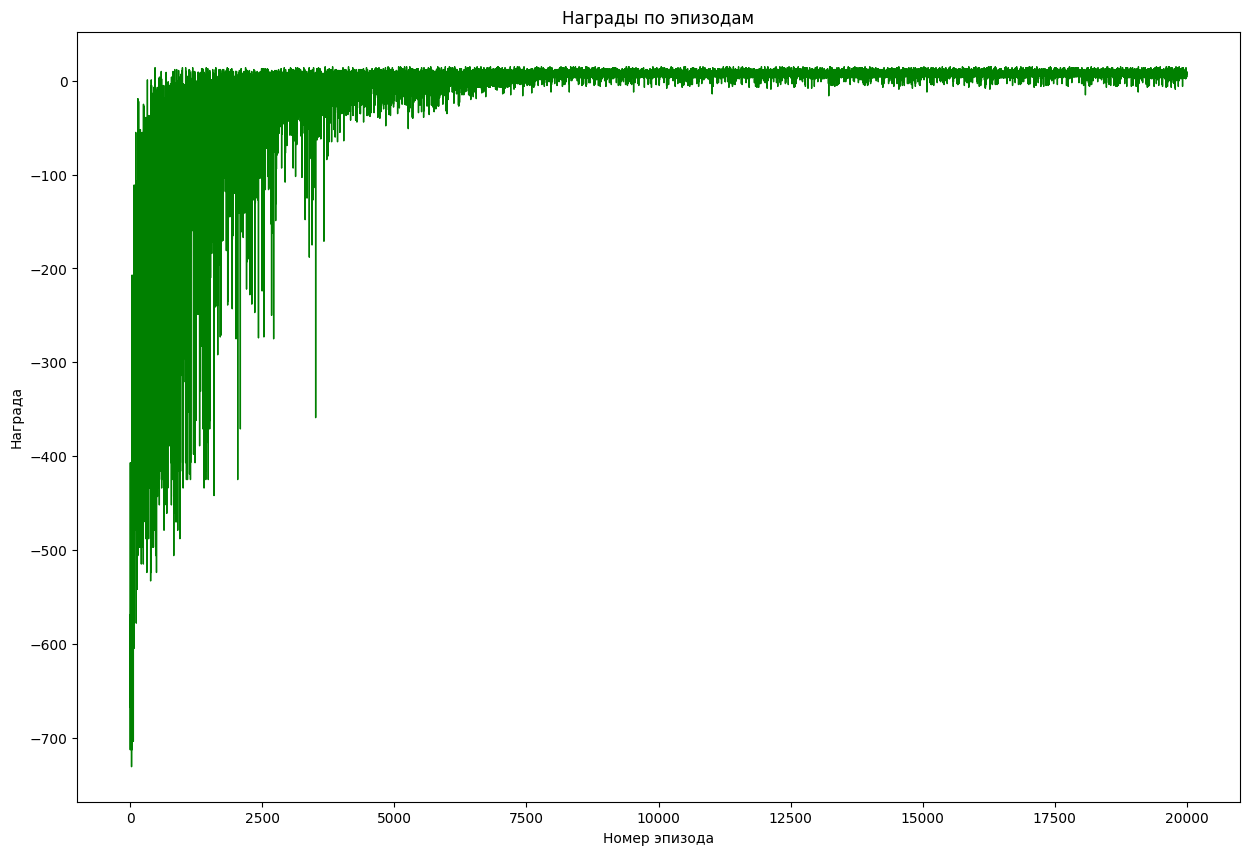

In [22]:
run_sarsa()

Q-обучение:

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20000/20000 [00:27<00:00, 718.14it/s]


Вывод Q-матрицы для алгоритма  Q-обучение
[[ 0.          0.          0.          0.          0.          0.        ]
 [ 4.94892692  6.31427444  3.3065194   5.84176744  8.36234335 -3.07764032]
 [ 9.42207947 10.94983909  8.57726824 11.65292067 13.27445578  2.28585815]
 ...
 [-0.58014039 11.2943735  -1.27407836  0.38579136 -4.82193482 -3.54854266]
 [-2.53574629  7.08990606 -1.61815446 -1.25115604 -8.62816954 -7.16174347]
 [10.87478324  9.81549619 13.05481371 18.59999999  5.13328814  5.33271154]]


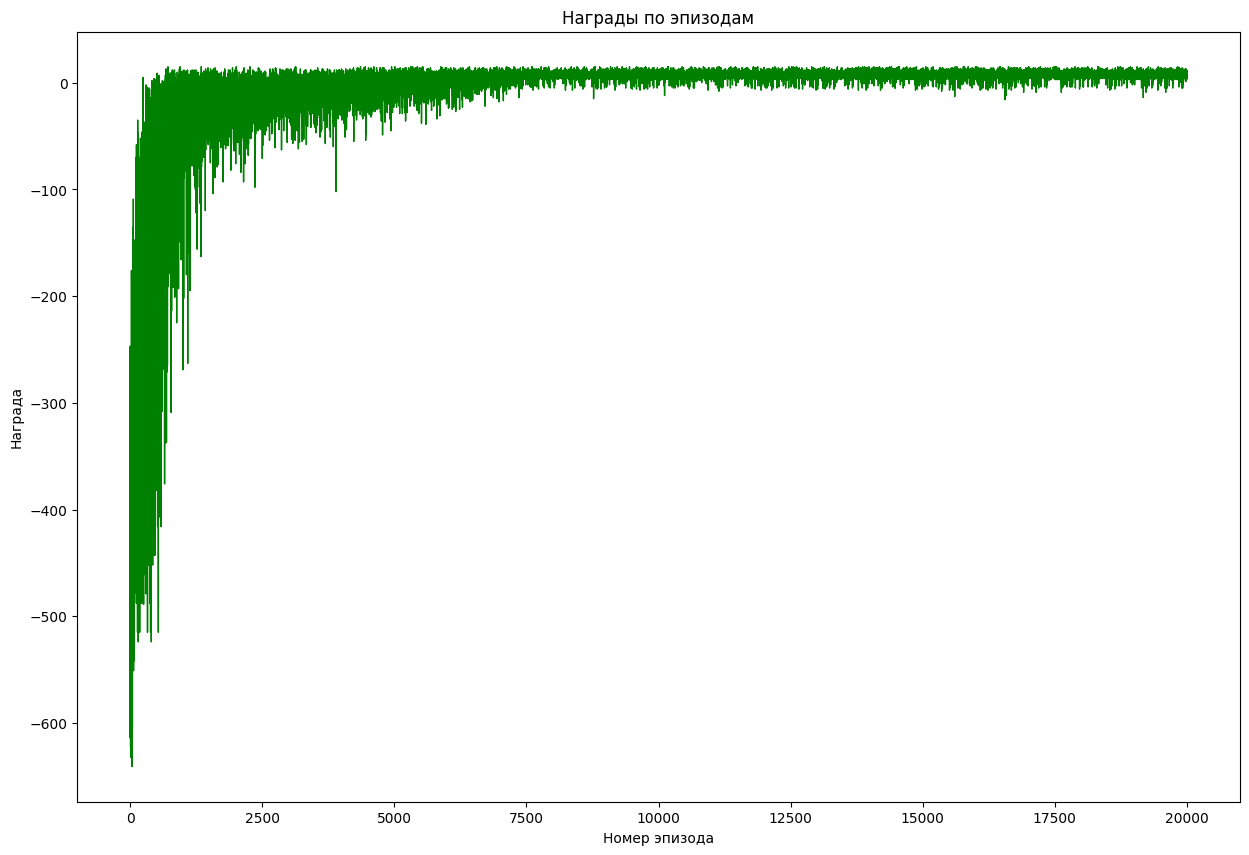

In [23]:
run_q_learning()

Двойное Q-обучение:

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20000/20000 [00:30<00:00, 661.85it/s]


Вывод Q-матриц для алгоритма  Двойное Q-обучение
Q1
[[ 0.          0.          0.          0.          0.          0.        ]
 [ 1.64741084  1.93482408 -0.14745692  1.36747385  8.36234335 -5.0746492 ]
 [ 7.1427645   9.19356892  5.53489319  8.7899762  13.27445578  0.51539363]
 ...
 [-1.44356188  7.27948424 -1.51409673 -0.24910525 -3.01626687 -2.26601431]
 [-3.40866072 -2.99100405 -3.27416291  6.91363734 -5.15180328 -4.60842005]
 [ 1.79232883  2.63235504  3.36859931 18.48108681  0.          0.25416393]]
Q2
[[ 0.          0.          0.          0.          0.          0.        ]
 [-0.41132706  0.84499169 -2.26345792  1.17103354  8.36234335 -5.44535199]
 [ 7.20017484  9.62853491  3.91580586  7.76672348 13.27445578  0.77359851]
 ...
 [-1.29510523  9.50453252 -1.43377333  0.35495819 -5.22197132 -4.35252715]
 [-2.22902726 -3.57127776 -2.67577989  5.90904088 -4.70042635 -7.04617935]
 [ 2.56112286  1.5250639   3.65709816 18.29578535 -0.20868566 -1.01967452]]


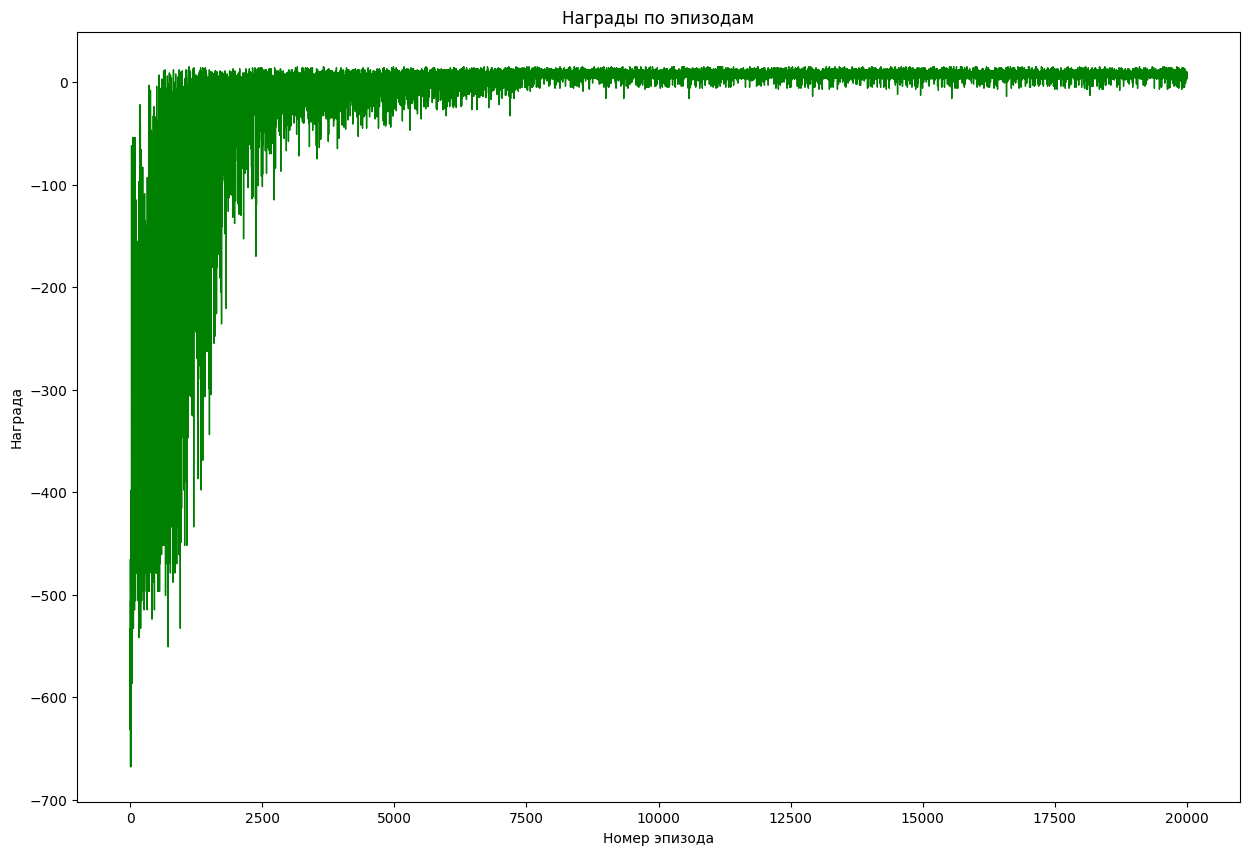

In [24]:
run_double_q_learning()